# <center> Simulación caso de Negocio - Credit Scoring </center>

El objetivo de esta actividad es diseñar e implementar un modelo de Credit Scoring en Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación un sistema de recomendación en una empresa. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## Sobre la empresa

El **Banco de Crédito del Perú (BCP)** es un banco peruano, fundado en 1889. Es propiedad del conglomerado financiero **Credicorp**. El **BCP** es considerado la entidad bancaria más grande del país. Entre los servicios que ofrece se encuentran financiamientos para comercio exterior, arrendamiento, seguros y asesoría financiera.

En la actualidad, **Banco de Crédito del Perú (BCP)** cuenta con 375 agencias, más de 1.800 cajeros y más de 5.600 agentes BCP.


## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

 **BCP** como parte de su estrategia de fortalecimiento en la gestión de riesgo de crédito ha decidido implementar un modelo de *credit scoring* para el segmento de Crédito de Vivienda. Para este fin, se ha solicitado al área de Riesgo de Crédito cree un modelo que evalúe la probabilidad de Default(impago) para los futuros clientes de este producto.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset**:

El conjunto de datos contiene la información de alrededor de 340 operaciones de crédito con garantía hipotecaria otorgadas dentro de los últimos 2 años.

**Diccionario de datos**:

* `DNI`: Identificación del cliente
* `Tipo de vivienda`: tipo de vivienda actual del cliente
* `Ingreso`: ingreso anual al momento de la solicitud
* `Default`: 1 en caso de que se cumplan 120 días de atraso en los 12 meses luego de la colocación
* `Flg_vehicular`:  1 en caso de que el cliente cuente con un crédito vehicular.

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [2]:
import dataprep as dpeda
import optbinning as optbin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as sklm
from sklearn import model_selection as skmodsel
from sklearn import metrics as skmet
from sklearn import set_config
set_config(display="diagram")

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data/nombre_archivo.csv")
```

In [5]:
loan_data = pd.read_csv("CreditoHipotecario.csv")
loan_data.head()

,DNI,TipoVivienda,Ingreso,Default,Flg_vehicular
0,1231497,Familiar,128000,1,0
1,1231498,Alquilada,40000,0,1
2,1231499,Alquilada,41600,0,1
3,1231500,Alquilada,44800,0,1
4,1231501,Alquilada,46400,0,1


In [6]:
loan_data.set_index('DNI', inplace=True)
loan_data.head(1)

,TipoVivienda,Ingreso,Default,Flg_vehicular
DNI,,,,
1231497,Familiar,128000,1,0


# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [9]:
loan_data.shape
loan_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Ingreso,339.0,117713.569322,86141.327689,19500.0,68400.0,104000.0,144000.0,1008000.0
Default,339.0,0.702065,0.458027,0.0,0.0,1.0,1.0,1.0
Flg_vehicular,339.0,0.300885,0.459321,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:ylabel='DNI'>

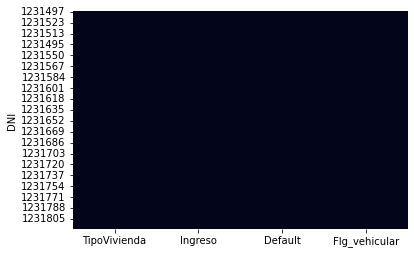

In [18]:
import seaborn as sns
sns.heatmap(loan_data.isnull(), cbar=False)

<AxesSubplot:>

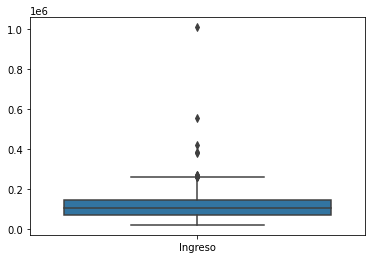

In [17]:
sns.boxplot(data= loan_data[['Ingreso']] ) 


**Limpieza de datos**

Podemos obsevar que aparentemen existen valores ouliers.

In [34]:
np.percentile(loan_data['Ingreso'], 99)

382340.0

In [35]:
loan_data[loan_data['Ingreso']>382340.0].count()

TipoVivienda     4
Ingreso          4
Default          4
Flg_vehicular    4
dtype: int64

In [ ]:
loan_data = loan_data[loan_data['Ingreso']>382340.0]

**Transformación de datos**

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

In [7]:
Este caso de uso no requiere la integración de otros datos.




# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

In [36]:
# Variables dependientes
var_x = list(set(loan_data.columns).difference(set(['Default'])))
print(var_x)


['Flg_vehicular', 'TipoVivienda', 'Ingreso']


In [37]:
X = loan_data[var_x]
y = loan_data['Default']

In [50]:
X_train, X_test, y_train, y_test = skmodsel.train_test_split(X, y, train_size = 0.6, random_state=42)


In [51]:
# Confirmación de dimensiones
print('X train:',X_train.shape)
print('X test:',X_test.shape)
print('y train:',y_train.shape)
print('y test:',y_test.shape)

X train: (203, 3)
X test: (136, 3)
y train: (203,)
y test: (136,)


In [52]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.05, "max": 1}
}

In [53]:
binpro = optbin.BinningProcess(var_x, selection_criteria=sel_crt)


In [54]:
# Regresión logística
logreg = sklm.LogisticRegression(class_weight='balanced')

In [60]:
# Scorecard
scorecard = optbin.Scorecard(binning_process=binpro, target=y,
                             estimator=logreg, 
                             scaling_method="min_max", scaling_method_params={"min":300, "max":1000})

In [63]:
y

DNI
1231497    1
1231498    0
1231499    0
1231500    0
1231501    0
          ..
1231816    0
1231817    1
1231818    0
1231819    1
1231820    1
Name: Default, Length: 339, dtype: int64

In [61]:
scorecard

Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.05}},
                                         variable_names=['Flg_vehicular',
                                                         'TipoVivienda',
                                                         'Ingreso']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 300},
          target=DNI
1231497    1
1231498    0
1231499    0
1231500    0
1231501    0
          ..
1231816    0
1231817    1
1231818    0
1231819    1
1231820    1
Name: Default, Length: 339, dtype: int64)

## Implementación

In [62]:
scorecard_fit = scorecard.fit(X_train, y_train, show_digits=4)


TypeError: target must be a string.

### Entrenamiento del modelo K-means

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [ ]:
# Haga un breve análisis de los hallazgos 


In [ ]:
# Detalle sus conclusiones sobre el modelo obtenido


In [ ]:
# Qué acciones sugerería a los directivos de la empresa?
